In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/home/aryan/Desktop/data/OnlineNewsPopularity.csv',sep='\s*,\s*')
df.head()

/home/aryan/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
#Separating URLs from the main data
df = df.drop(['url'],axis=1)

# Detecting Outliers

Outliers can easily be detected through boxplot

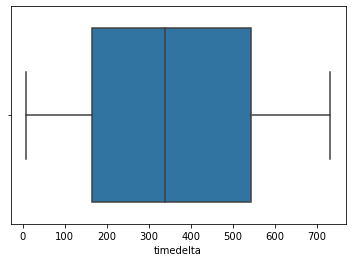

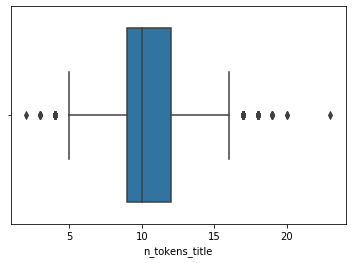

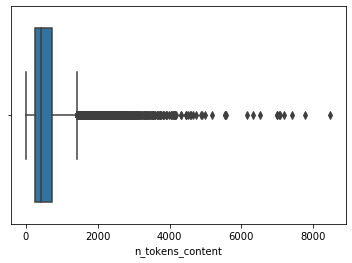

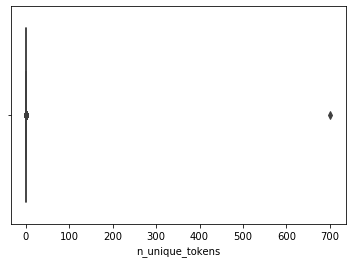

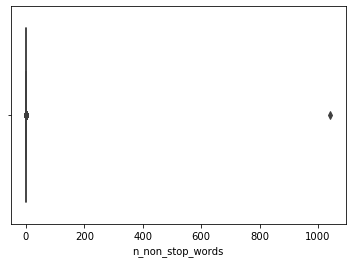

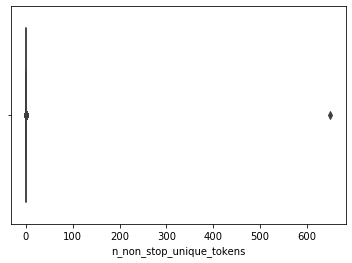

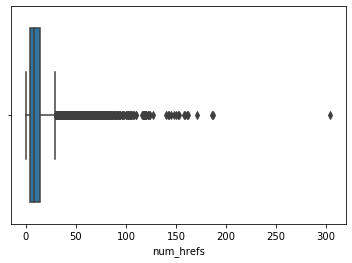

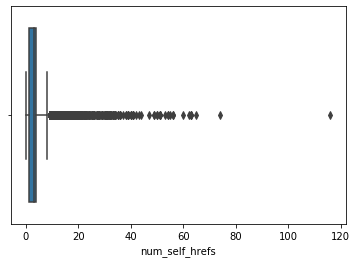

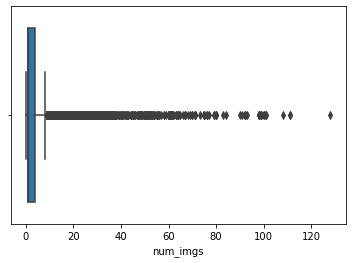

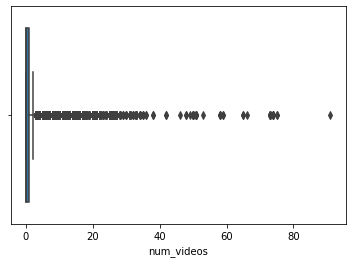

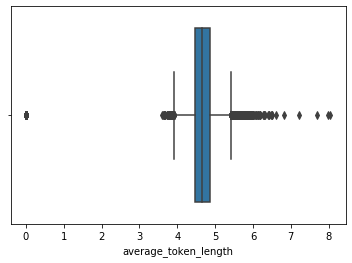

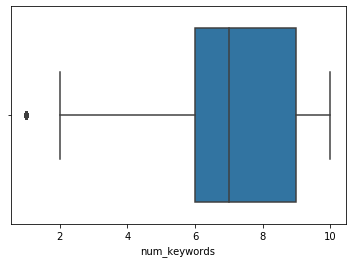

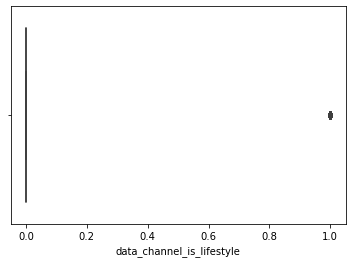

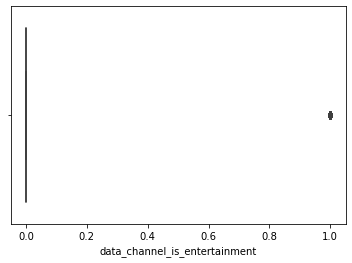

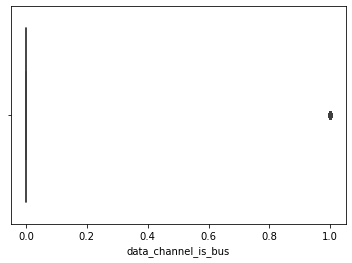

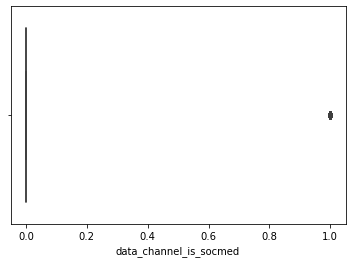

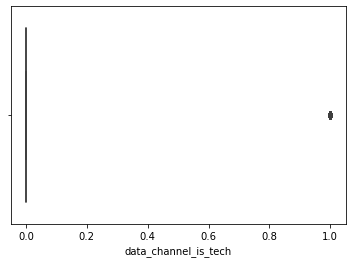

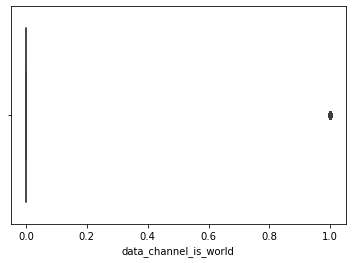

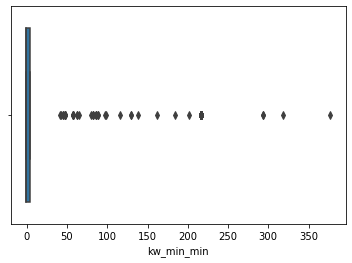

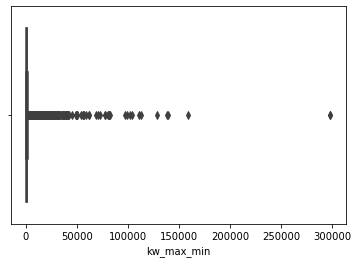

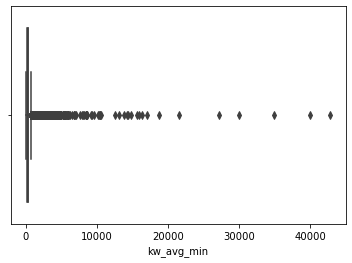

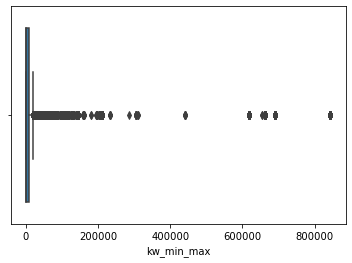

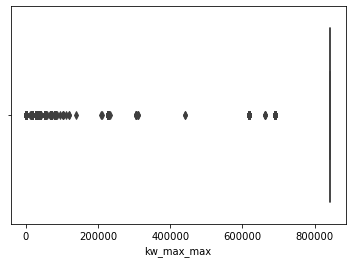

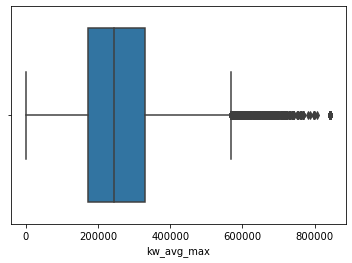

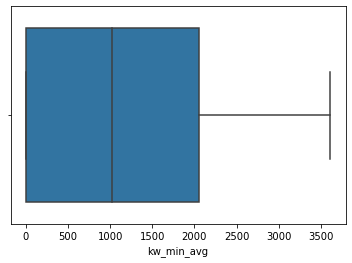

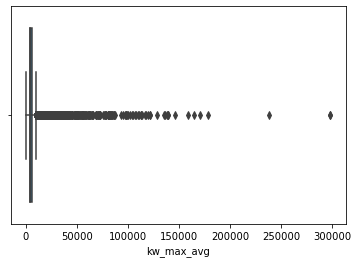

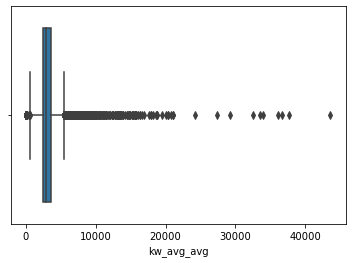

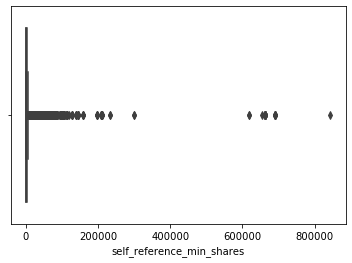

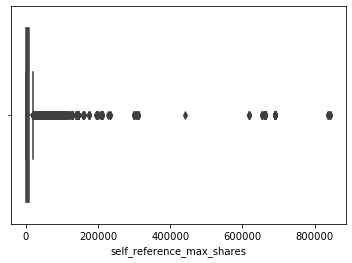

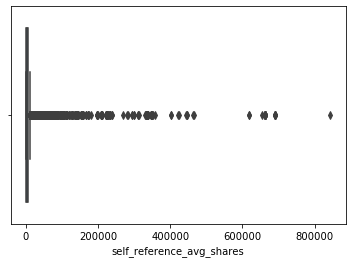

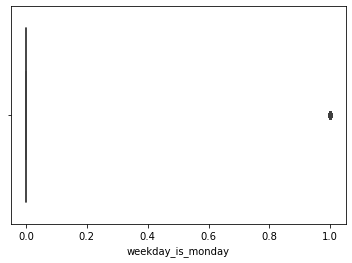

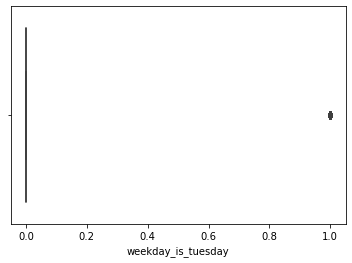

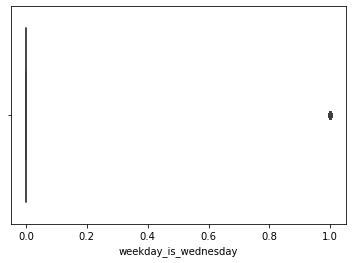

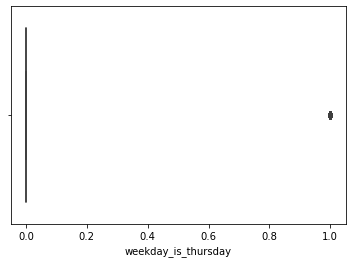

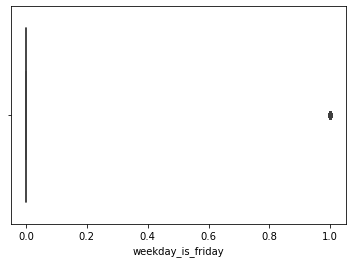

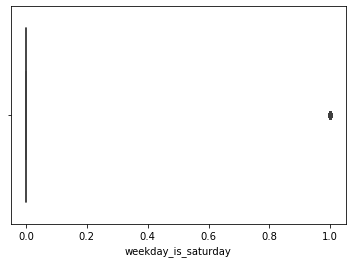

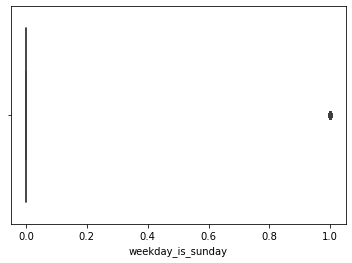

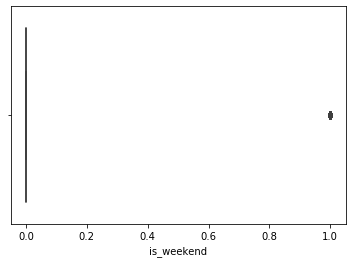

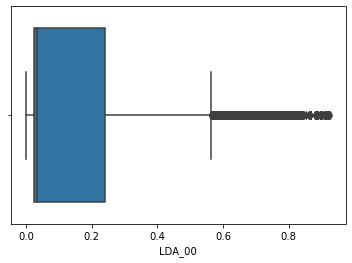

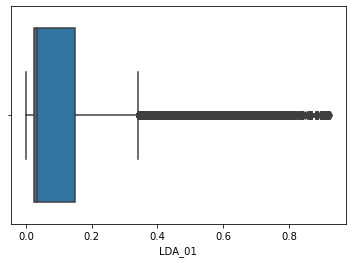

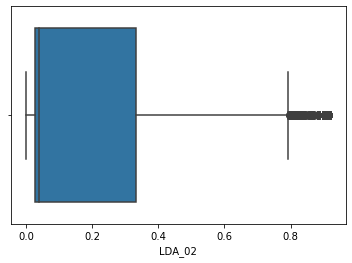

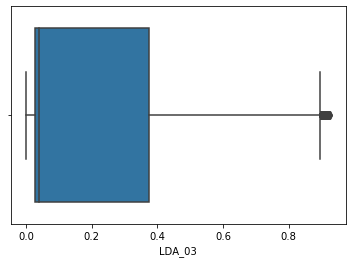

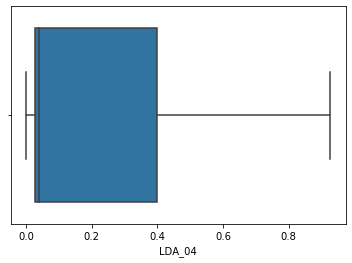

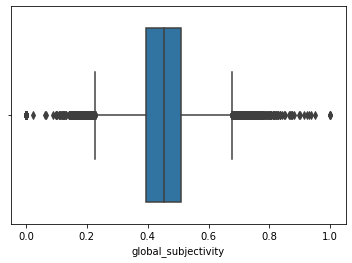

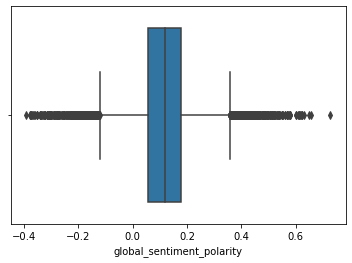

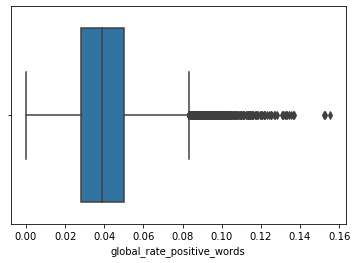

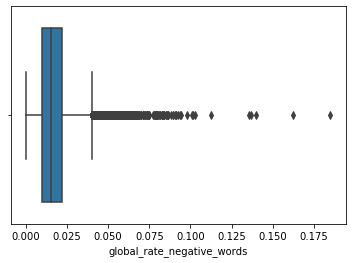

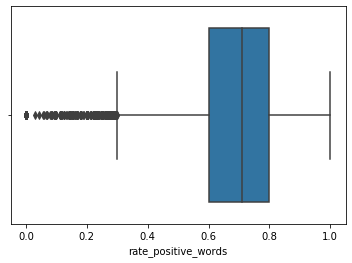

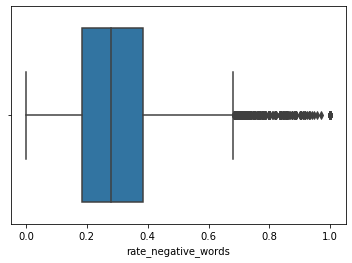

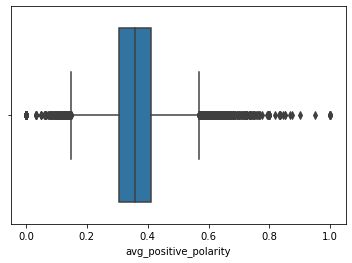

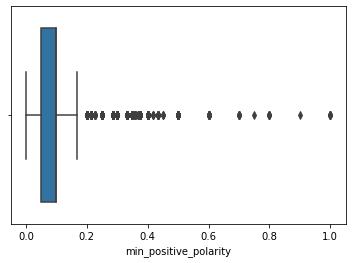

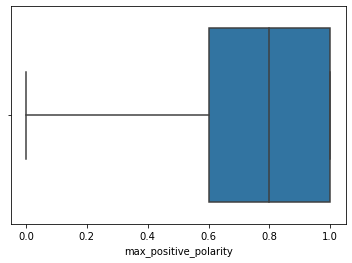

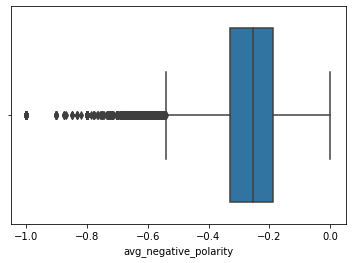

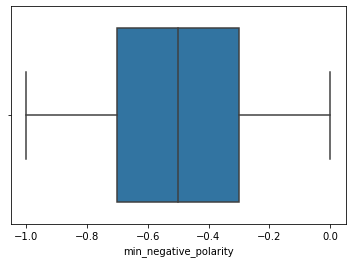

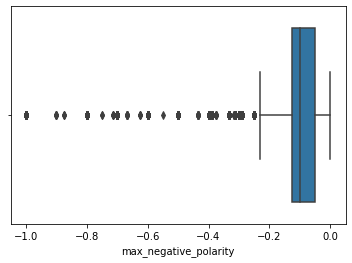

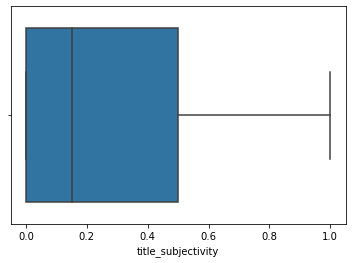

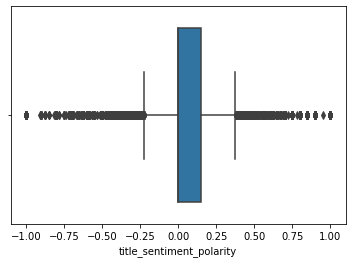

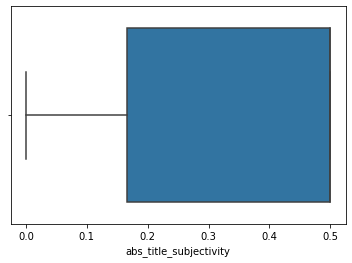

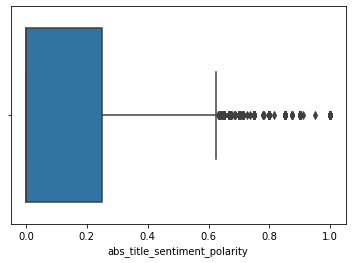

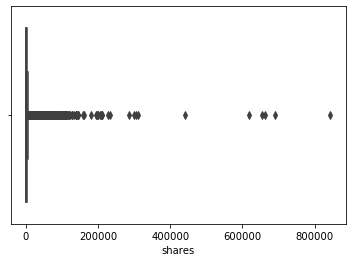

In [3]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

# Removing Outliers

Here we make use of IQR (Interquartile Range) Method for removing outliers

In [4]:
Q1 = df.quantile(q=0.25) 

Q3 = df.quantile(q=0.75)

IQR = Q3-Q1
print('IQR for each column:- ')
print(IQR)

IQR for each column:- 
timedelta                        3.780000e+02
n_tokens_title                   3.000000e+00
n_tokens_content                 4.700000e+02
n_unique_tokens                  1.378252e-01
n_non_stop_words                 5.000000e-09
n_non_stop_unique_tokens         1.288902e-01
num_hrefs                        1.000000e+01
num_self_hrefs                   3.000000e+00
num_imgs                         3.000000e+00
num_videos                       1.000000e+00
average_token_length             3.764347e-01
num_keywords                     3.000000e+00
data_channel_is_lifestyle        0.000000e+00
data_channel_is_entertainment    0.000000e+00
data_channel_is_bus              0.000000e+00
data_channel_is_socmed           0.000000e+00
data_channel_is_tech             0.000000e+00
data_channel_is_world            0.000000e+00
kw_min_min                       5.000000e+00
kw_max_min                       5.550000e+02
kw_avg_min                       2.152500e+02
kw_min_max 

Sorting and taking the median values from shares column

In [5]:
sorted_shares = df.sort_values('shares') 

median = sorted_shares['shares'].median() 

q1 = sorted_shares['shares'].quantile(q=0.25) 

q3 = sorted_shares['shares'].quantile(q=0.75) 

iqr = q3-q1

Finding Major and Minor Outliers

In [6]:
Inner_bound1 = q1-(iqr*1.5) 
print(f'Inner Boundary 1 = {Inner_bound1}')
Inner_bound2 = q3+(iqr*1.5)  
print(f'Inner Boundary 2 = {Inner_bound2}')
Outer_bound1 = q1-(iqr*3)    
print(f'Outer Boundary 1 = {Outer_bound1}')
Outer_bound2 = q3+(iqr*3)   
print(f'Outer Boundary 2 = {Outer_bound2}')

Inner Boundary 1 = -1835.0
Inner Boundary 2 = 5581.0
Outer Boundary 1 = -4616.0
Outer Boundary 2 = 8362.0


So we select the 2nd Outer Boundary for Outlier Removal

In [7]:
Df = df[df['shares']<=Outer_bound2]

In [8]:
print(f'Data before Removing Outliers = {df.shape}')
print(f'Data after Removing Outliers = {Df.shape}')
print(f'Number of Outliers = {df.shape[0] - Df.shape[0]}')

Data before Removing Outliers = (39644, 60)
Data after Removing Outliers = (36879, 60)
Number of Outliers = 2765


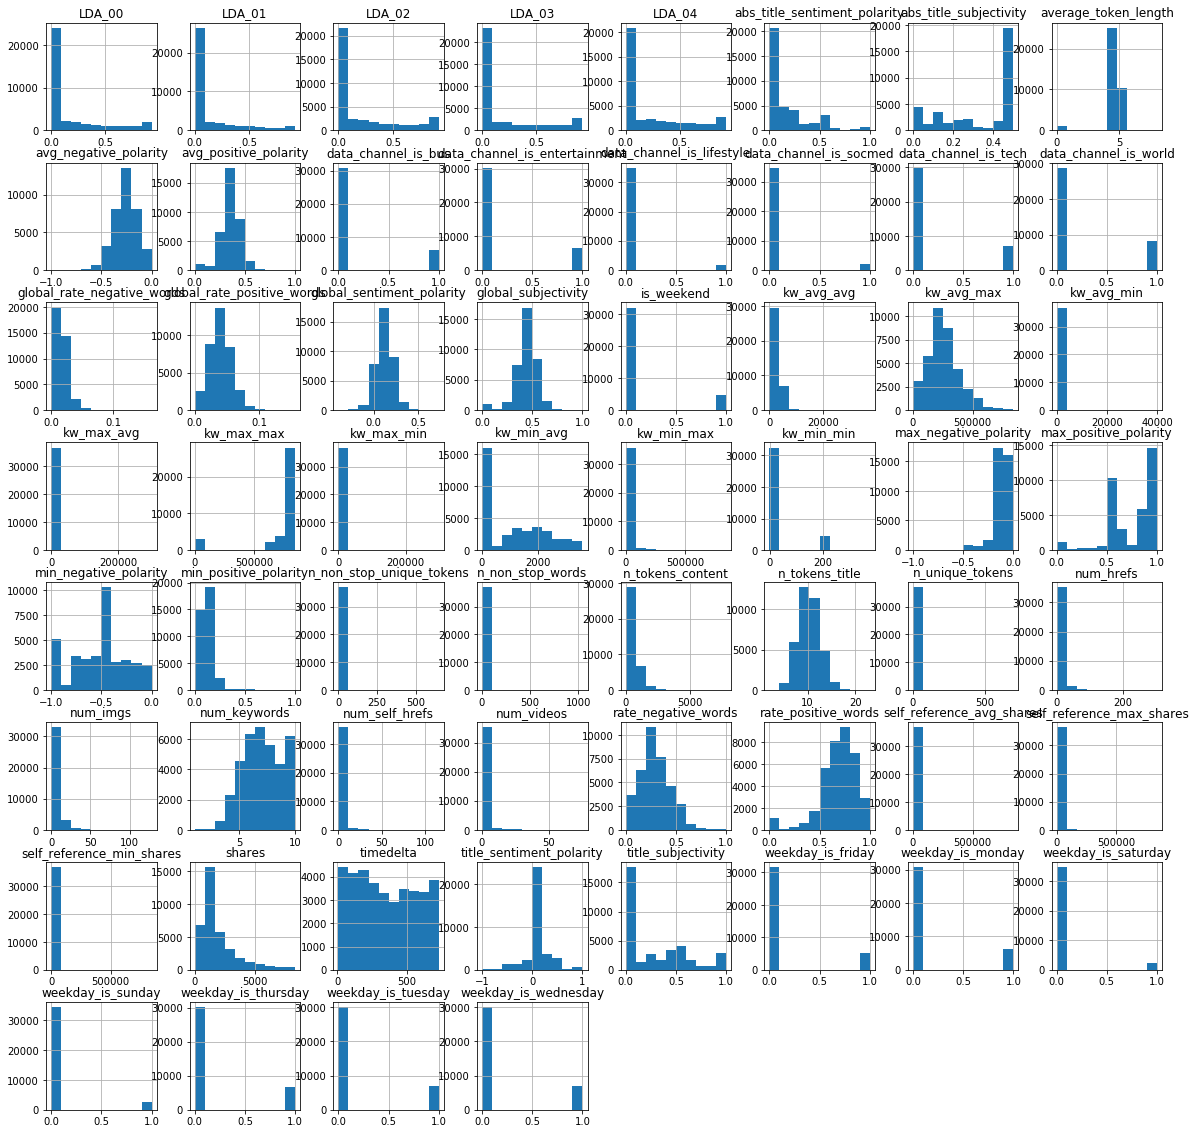

In [9]:
Df.hist(figsize=(20,20))
plt.show()

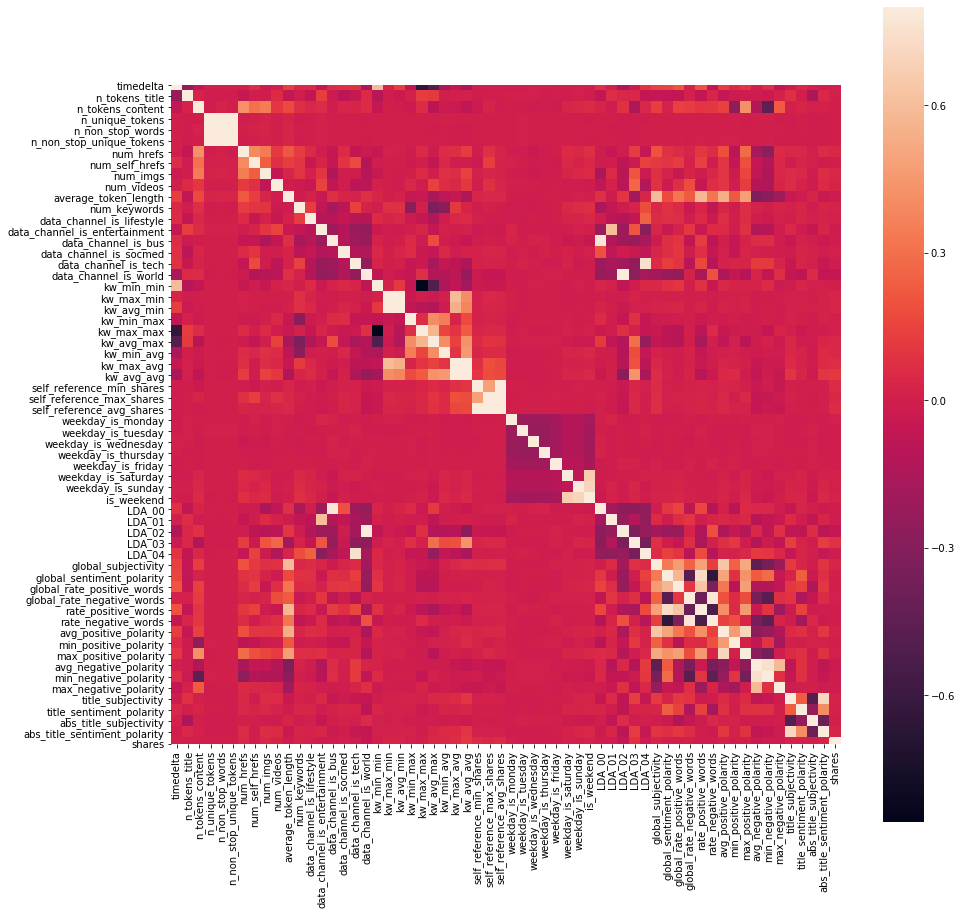

In [10]:
corr = df.corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax = .8, square = True)
plt.show()

In [11]:
#Helping Index for referrings
for i in range(len(Df.columns)):
    print(f'{i} -> {Df.columns[i]}')

0 -> timedelta
1 -> n_tokens_title
2 -> n_tokens_content
3 -> n_unique_tokens
4 -> n_non_stop_words
5 -> n_non_stop_unique_tokens
6 -> num_hrefs
7 -> num_self_hrefs
8 -> num_imgs
9 -> num_videos
10 -> average_token_length
11 -> num_keywords
12 -> data_channel_is_lifestyle
13 -> data_channel_is_entertainment
14 -> data_channel_is_bus
15 -> data_channel_is_socmed
16 -> data_channel_is_tech
17 -> data_channel_is_world
18 -> kw_min_min
19 -> kw_max_min
20 -> kw_avg_min
21 -> kw_min_max
22 -> kw_max_max
23 -> kw_avg_max
24 -> kw_min_avg
25 -> kw_max_avg
26 -> kw_avg_avg
27 -> self_reference_min_shares
28 -> self_reference_max_shares
29 -> self_reference_avg_shares
30 -> weekday_is_monday
31 -> weekday_is_tuesday
32 -> weekday_is_wednesday
33 -> weekday_is_thursday
34 -> weekday_is_friday
35 -> weekday_is_saturday
36 -> weekday_is_sunday
37 -> is_weekend
38 -> LDA_00
39 -> LDA_01
40 -> LDA_02
41 -> LDA_03
42 -> LDA_04
43 -> global_subjectivity
44 -> global_sentiment_polarity
45 -> global_rat

# Exploratory Data Analysis

In [12]:
a,b = Df['shares'].mean(),Df['shares'].median()

In [13]:
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 1916.4932888635808
Median article share = 1300.0


In [14]:
Wd = Df.columns.values[30:37]
Wd

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

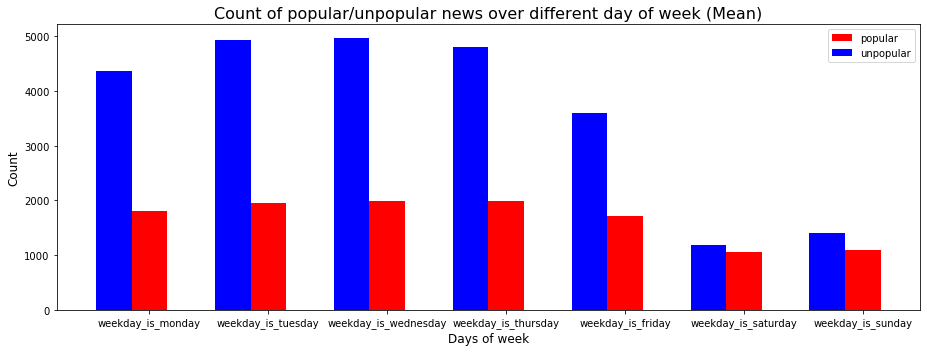

In [15]:
Unpop=Df[Df['shares']<a]
Pop=Df[Df['shares']>=a]
Unpop_day = Unpop[Wd].sum().values
Pop_day = Pop[Wd].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

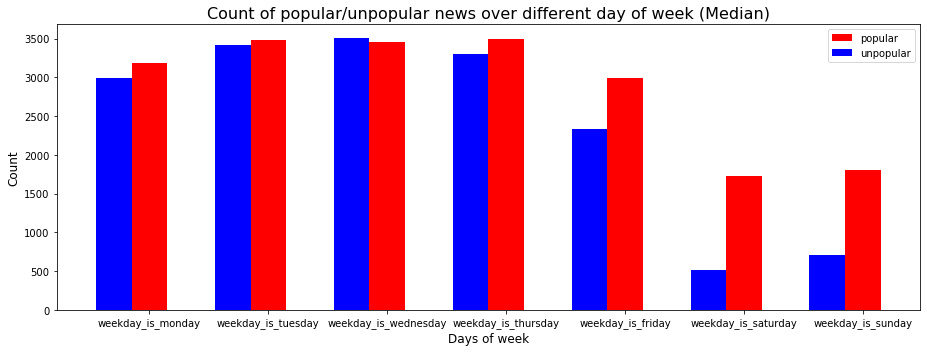

In [16]:
Unpop2=Df[Df['shares']<b]
Pop2=Df[Df['shares']>=b]
Unpop_day2 = Unpop2[Wd].sum().values
Pop_day2 = Pop2[Wd].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)
plt.bar(np.arange(len(Wd)), Pop_day2, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Wd)) - 0.3, Unpop_day2, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Wd)), Wd)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [17]:
Dc = Df.columns.values[12:18]

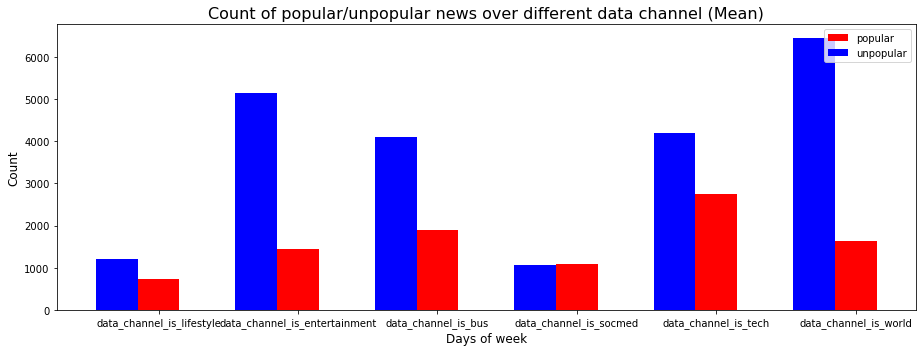

In [18]:
Unpop3=Df[Df['shares']<a]
Pop3=Df[Df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

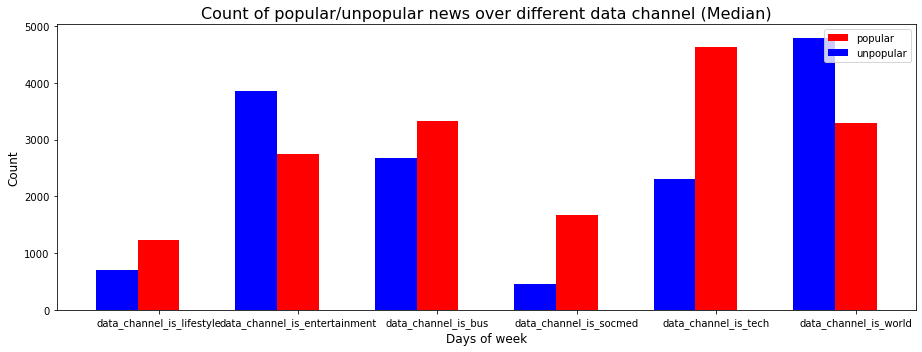

In [19]:
Unpop4=Df[Df['shares']<b]
Pop4=Df[Df['shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'r', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = 'b', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

# Train-Test Splitting

In [20]:
from sklearn.preprocessing import scale as s
from sklearn.model_selection import train_test_split as t

In [21]:
DF = s(Df)

In [22]:
train,test = t(DF,test_size=0.2,random_state=0)

In [23]:
train_x,train_y = DF[:,0:59],DF[:,59] 

In [24]:
test_x,test_y = DF[:,0:59],DF[:,59]

# Using Neural Networks

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [26]:
nn = Sequential()

#Input Layer
nn.add(Dense(59,input_dim = train_x.shape[1],kernel_initializer='normal',activation='relu'))

#Hidden Layer(s)
nn.add(Dense(200,activation='relu'))
nn.add(Dense(100,activation='relu'))
nn.add(Dense(50,activation='relu'))
nn.add(Dense(20,activation='relu'))


#Output Layer
nn.add(Dense(1,activation='linear'))

#Compilation
nn.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
nn.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 59)                3540      
_________________________________________________________________
dense_2 (Dense)              (None, 200)               12000     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 41,731
Trainable params: 41,731
Non-trainable params: 0


In [27]:
history = nn.fit(train_x, train_y, epochs=100, batch_size=32, validation_split = 0.2, verbose=1)
loss = history.history['loss']

Instructions for updating:
Use tf.cast instead.
Train on 29503 samples, validate on 7376 samples
Epoch 1/100
29503/29503 [==============================] - 4s 128us/step - loss: 0.6309 - mean_squared_error: 1.0922 - val_loss: 0.5548 - val_mean_squared_error: 0.8516
Epoch 2/100
29503/29503 [==============================] - 2s 73us/step - loss: 0.6179 - mean_squared_error: 1.0280 - val_loss: 0.5608 - val_mean_squared_error: 0.8331
Epoch 3/100
29503/29503 [==============================] - 2s 73us/step - loss: 0.6123 - mean_squared_error: 1.0124 - val_loss: 0.5611 - val_mean_squared_error: 0.8626
Epoch 4/100
29503/29503 [==============================] - 2s 76us/step - loss: 0.6084 - mean_squared_error: 1.0026 - val_loss: 0.5574 - val_mean_squared_error: 0.8519
Epoch 5/100
29503/29503 [==============================] - 2s 77us/step - loss: 0.6049 - mean_squared_error: 0.9932 - val_loss: 0.5717 - val_mean_squared_error: 0.8296
Epoch 6/100
29503/29503 [==============================] - 2s 

Epoch 48/100
29503/29503 [==============================] - 2s 68us/step - loss: 0.3961 - mean_squared_error: 0.4956 - val_loss: 0.6344 - val_mean_squared_error: 1.0212
Epoch 49/100
29503/29503 [==============================] - 2s 67us/step - loss: 0.3939 - mean_squared_error: 0.4871 - val_loss: 0.6378 - val_mean_squared_error: 0.9981
Epoch 50/100
29503/29503 [==============================] - 2s 66us/step - loss: 0.3911 - mean_squared_error: 0.4819 - val_loss: 0.6421 - val_mean_squared_error: 1.0159
Epoch 51/100
29503/29503 [==============================] - 2s 67us/step - loss: 0.3870 - mean_squared_error: 0.4753 - val_loss: 0.6344 - val_mean_squared_error: 1.0115
Epoch 52/100
29503/29503 [==============================] - 2s 66us/step - loss: 0.3851 - mean_squared_error: 0.4683 - val_loss: 0.6544 - val_mean_squared_error: 1.0507
Epoch 53/100
29503/29503 [==============================] - 2s 71us/step - loss: 0.3813 - mean_squared_error: 0.4611 - val_loss: 0.6300 - val_mean_squared_

29503/29503 [==============================] - 2s 78us/step - loss: 0.3033 - mean_squared_error: 0.3043 - val_loss: 0.6478 - val_mean_squared_error: 1.0361
Epoch 97/100
29503/29503 [==============================] - 2s 76us/step - loss: 0.3019 - mean_squared_error: 0.3010 - val_loss: 0.6561 - val_mean_squared_error: 1.0627
Epoch 98/100
29503/29503 [==============================] - 3s 85us/step - loss: 0.3021 - mean_squared_error: 0.3113 - val_loss: 0.6562 - val_mean_squared_error: 1.0444
Epoch 99/100
29503/29503 [==============================] - 2s 81us/step - loss: 0.2996 - mean_squared_error: 0.2962 - val_loss: 0.6684 - val_mean_squared_error: 1.0677
Epoch 100/100
29503/29503 [==============================] - 3s 87us/step - loss: 0.2967 - mean_squared_error: 0.2929 - val_loss: 0.6603 - val_mean_squared_error: 1.0751


In [28]:
nn.evaluate(test_x,test_y)

36879/36879 [==============================] - 1s 27us/step


[0.364701885379005, 0.44525829407594647]

In [29]:
from keras.optimizers import SGD
opt = SGD(lr=0.5,momentum=0.9)
nn.compile(loss='mean_squared_error',optimizer=opt)

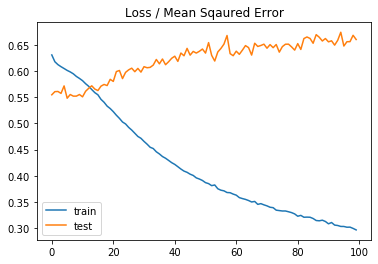

In [30]:
plt.title('Loss / Mean Sqaured Error')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [31]:
y_pred = nn.predict(test_x)
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from math import sqrt
print(f'MAE  = {mean_absolute_error(test_y,y_pred)}')
print(f'MSE  = {mean_squared_error(test_y,y_pred)}')
print(f'RMSE = {sqrt(mean_squared_error(test_y,y_pred))}')

MAE  = 0.3647018846877258
MSE  = 0.44525829368747405
RMSE = 0.667276774425331


In [32]:
train_mse = nn.evaluate(train_x,train_y,verbose=0)
test_mse = nn.evaluate(test_x,test_y,verbose=0)
print('Train = %.3f, Test = %.3f' % (train_mse,test_mse))

Train = 0.445, Test = 0.445


In [33]:
from sklearn.neural_network import MLPRegressor

In [34]:
mlp = MLPRegressor(hidden_layer_sizes = (200,100,50,1),max_iter=1000)
mlp.fit(train_x,train_y)
mlp_mse = mean_squared_error(test_y,mlp.predict(test_x))
mlp_mse

0.10738037299734808